In [2]:
!pip install keras-ocr

In [52]:
import matplotlib.pyplot as plt
import keras_ocr
from PIL import Image
import numpy as np
import cv2 
import pandas as pd

In [48]:
#load model
pipeline = keras_ocr.pipeline.Pipeline()

Looking for C:\Users\DELL\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\DELL\.keras-ocr\crnn_kurapan.h5


In [49]:
image = cv2.imread("army_size.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
image_length = [image]

In [50]:
# Get the predictions
prediction_groups = pipeline.recognize(image_length)

3/3 [==============================] - 8s 2s/step


In [61]:
data_dict = [{'Word': word, 'Coordinates': coords} for word, coords in prediction_groups[0]]
df = pd.DataFrame(data_dict)
print(df)

        Word  \
0   big        
1   armyz      
2   how        
3   the        
4   is         
..  ..         
69  100000     
70  ogha       
71  1          
72  mahaugha   
73  e          

                                                                                      Coordinates  
0   [[166.41034, 12.197313], [265.78406, 18.93451], [261.59418, 80.73519], [162.22046, 73.99799]]  
1   [[469.53134, 17.209795], [665.767, 14.709978], [666.5786, 78.41939], [470.34296, 80.919205]]   
2   [[13.0, 16.0], [145.0, 16.0], [145.0, 67.0], [13.0, 67.0]]                                     
3   [[345.0, 16.0], [444.0, 16.0], [444.0, 67.0], [345.0, 67.0]]                                   
4   [[282.0, 17.0], [327.0, 17.0], [327.0, 66.0], [282.0, 66.0]]                                   
..                                                           ...                                   
69  [[59.0, 600.0], [196.0, 600.0], [196.0, 636.0], [59.0, 636.0]]                                 
70  [[2

In [19]:
for i in prediction_groups[0]:
    print(i[0])

big
armyz
the
how
is
ci
crore
koti
1
1001
000
shanku
koti
1
s
1001
000
shanku
shanku
maha
1
e
100000
maha
shanku
vrindam
1
e
1001
000
vrindam
maha
vrindam
1
s
1001
000
maha
vrindam
padmam
1

000
1001
maha
padmam
1
padmam
e
1001
000
maha
kharvam
padmam
1
l
1000
000
kharvam
kharvam
1
maha

1004
000
kharvam
samudram
maha
1
e
1000
000
samudram
ogha
1
e
1001
000
ogha
mahaugha
1



In [20]:
# Convert the NumPy array to a Pillow image
pil_image = Image.fromarray(image_length[0])

# Display the image
pil_image.show()

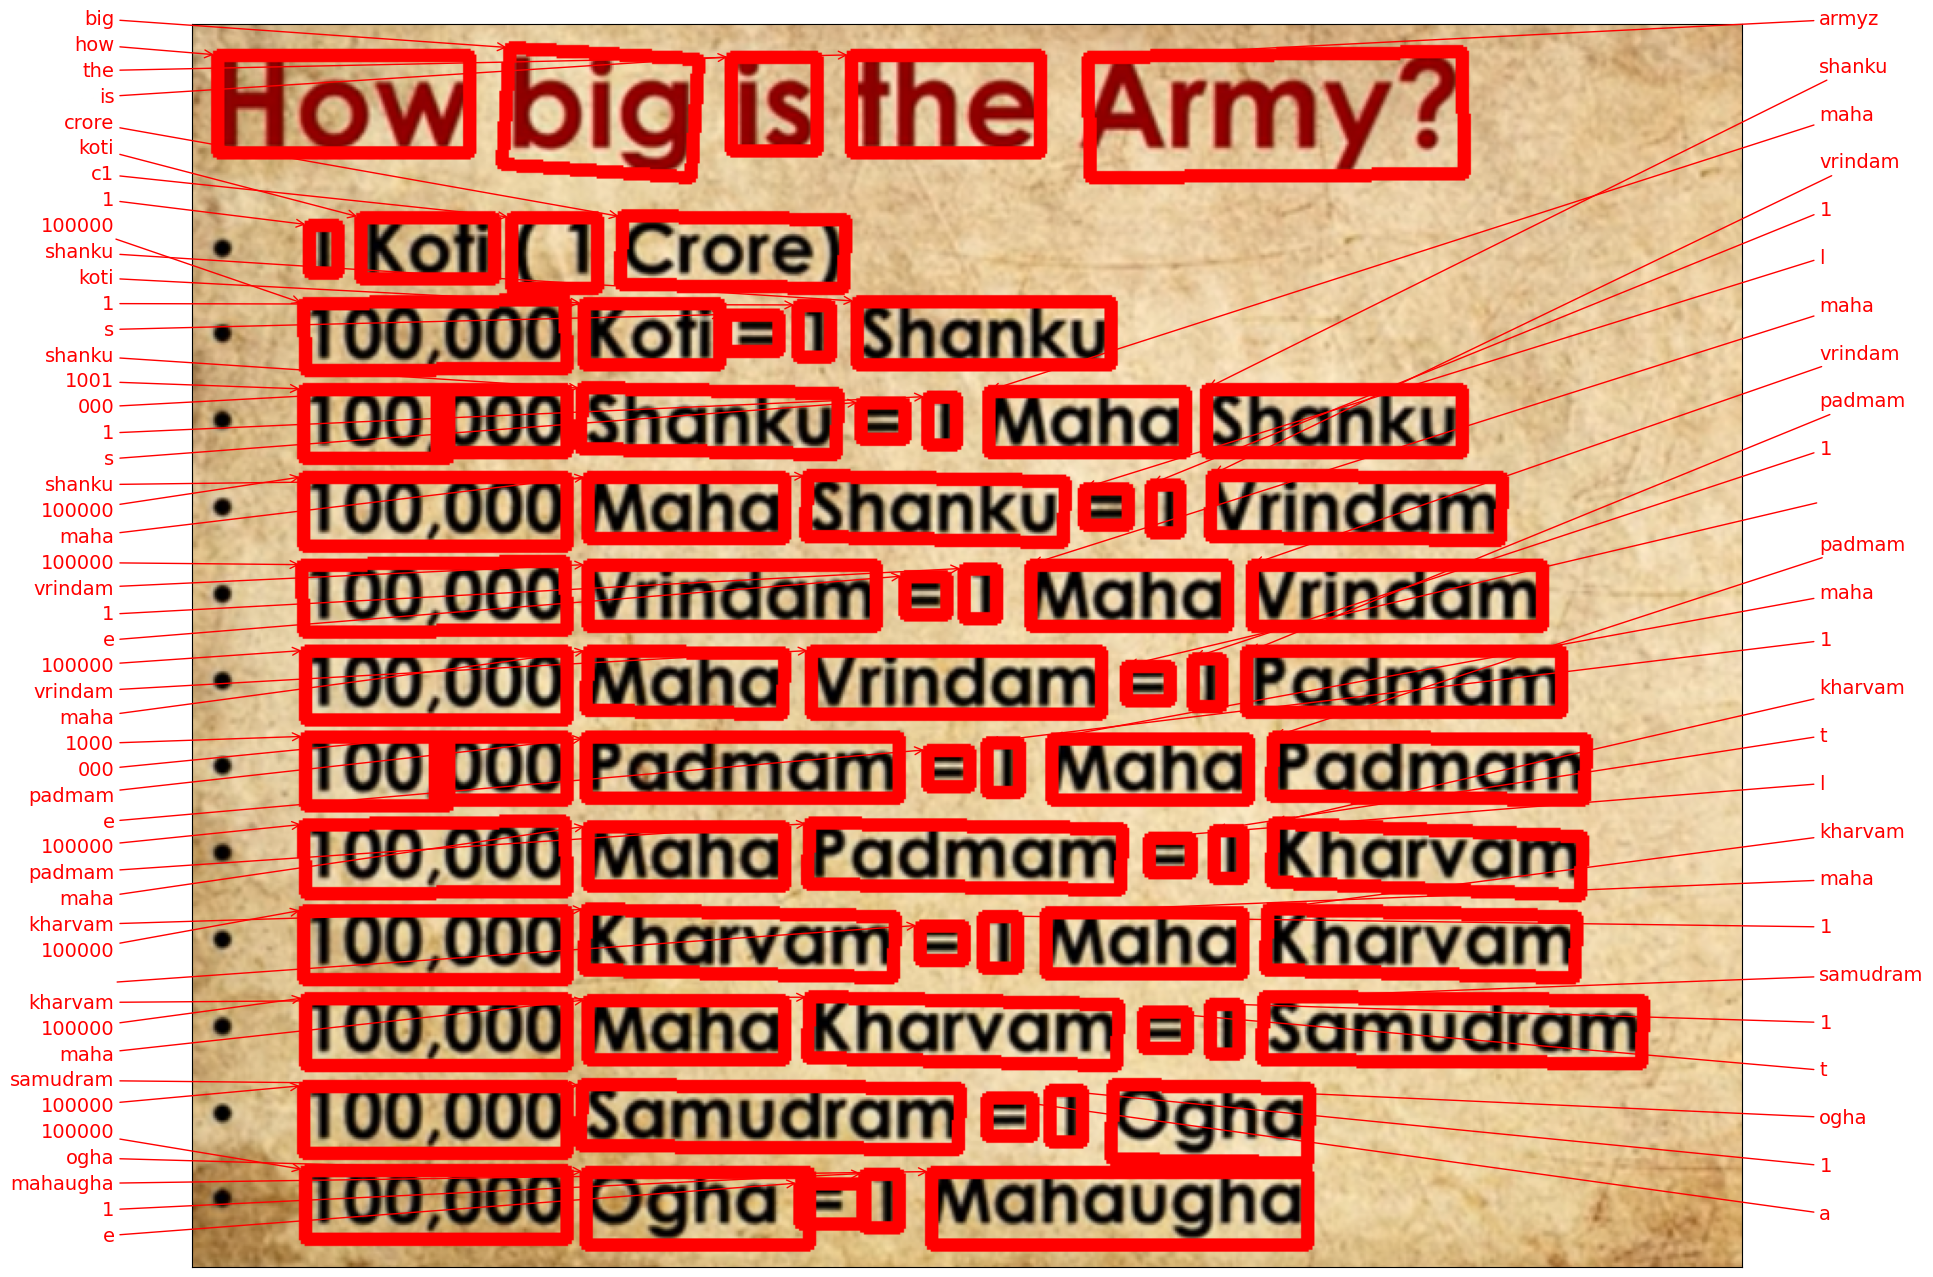

In [38]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(image_length), figsize=(20, 20))

# If there is only one image, axs will not be a sequence, so we need to wrap it in a list
if not isinstance(axs, np.ndarray):
    axs = [axs]

for ax, image, predictions in zip(axs, image_length, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

plt.show()
# print(predictions)

                                                            THANK YOU